In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data

X          Y
0   33.502345  45.707006
1   53.426804  78.777596
2   51.530358  72.562382
3   47.475640  71.546632
4   59.813208  87.230925
..        ...        ...
95  50.030174  81.536991
96  49.239765  72.111832
97  50.039576  85.232007
98  48.149859  66.224958
99  25.128485  53.454394

[100 rows x 2 columns]

<AxesSubplot:xlabel='X', ylabel='Y'>

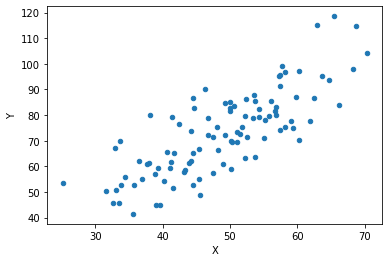

In [4]:
data.plot(kind = 'scatter', x = 'X', y= 'Y')

In [5]:
mean_x = np.mean(data.X)
mean_y = np.mean(data.Y)
print(mean_x)
print(mean_y)

48.868341461600004
73.07505055389997


In [6]:
num = 0
for i in range(0, len(data.X)):
    num = num + ((data.X[i] - mean_x)*(data.Y[i] - mean_y))
num

12354.1840390897

In [7]:
den = 0
for x in data.X:
    den = den + pow((x - mean_x), 2)
den

9220.036718170659

In [8]:
m = num / den
m

1.3399278567668096

In [9]:
c = mean_y - m*mean_x
c

7.594998515509658

In [10]:
pred_value = data.X*m + c

In [11]:
data["pred_value"] = pred_value

In [12]:
data

X          Y  pred_value
0   33.502345  45.707006   52.485724
1   53.426804  78.777596   79.183062
2   51.530358  72.562382   76.641961
3   47.475640  71.546632   71.208931
4   59.813208  87.230925   87.740382
..        ...        ...         ...
95  50.030174  81.536991   74.631823
96  49.239765  72.111832   73.572732
97  50.039576  85.232007   74.644420
98  48.149859  66.224958   72.112336
99  25.128485  53.454394   41.265355

[100 rows x 3 columns]

In [13]:
sop = 0
for i in range(0, len(data.X)):
    sop = sop + pow((data.pred_value[i] - data.Y[i]), 2)
sop = sop / len(data.X)
sop

98.71362491351108

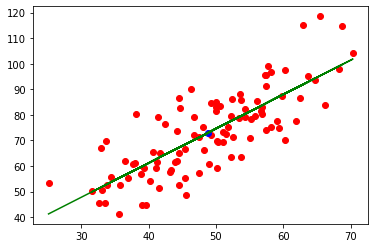

In [14]:
plt.scatter(data.X, data.Y, color = 'r')
plt.plot(data.X, data.pred_value, color = 'g')
plt.scatter(mean_x, mean_y,  color = 'b')
plt.show()

In [15]:
#Gradient Descent

alpha = 0.0001
data["gd_pred_val"] = range(0, len(data.X))

In [16]:
def update():
    m , c = 0, 0
    for j in range(0, 100):
        DM = 0
        DC = 0
        for i in range(0, len(data.Y)):
            DM = DM + (m*data.X[i] + c - data.Y[i])*data.X[i]
            DC = DC + (m*data.X[i] + c  - data.Y[i])
        DM = (DM)*2/len(data.X)
        DC = (DC)*2/len(data.X)
            
        m = m - alpha*DM
        c = c - alpha*DC
        print(m, c)
    
    for i in range(0, len(data.X)):
        data.gd_pred_val[i] = m*data.X[i] + c
update()

0.7389196726365127 0.014615010110779994
1.111145769150939 0.02200514144451888
1.2986520306198437 0.025755780354913924
1.393106709840302 0.02767304513519679
1.4406871757071646 0.028666757759165353
1.4646550191528058 0.02919523595003235
1.4767281363167237 0.029489354693741227
1.4828093517449792 0.02966541597128691
1.485872180239785 0.029782006254167177
1.4874145132275216 0.029868638149246368
1.488190905124248 0.0299401784669281
1.4885814584906478 0.030004116279682854
1.4887776478626376 0.030064224165821413
1.4888759274651988 0.030122402540538436
1.4889248855739072 0.03017960872734518
1.4889489982604316 0.03023632497259983
1.48896059520878 0.0302927942052057
1.4889658874282106 0.03034913879923869
1.4889680036798476 0.03040542039995563
1.4889685200595828 0.0304616700608109
1.4889682305168936 0.03051790342480976
1.4889675349993823 0.030574128372030017
1.4889666349784132 0.03063034887201828
1.4889656319440576 0.03068656692441295
1.4889645770213704 0.03074278353652222
1.4889634959643114 0.030

C:\Users\sidhu\AppData\Local\Temp/ipykernel_7640/3749765815.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.gd_pred_val[i] = m*data.X[i] + c


In [17]:
data

X          Y  pred_value  gd_pred_val
0   33.502345  45.707006   52.485724           49
1   53.426804  78.777596   79.183062           79
2   51.530358  72.562382   76.641961           76
3   47.475640  71.546632   71.208931           70
4   59.813208  87.230925   87.740382           89
..        ...        ...         ...          ...
95  50.030174  81.536991   74.631823           74
96  49.239765  72.111832   73.572732           73
97  50.039576  85.232007   74.644420           74
98  48.149859  66.224958   72.112336           71
99  25.128485  53.454394   41.265355           37

[100 rows x 4 columns]

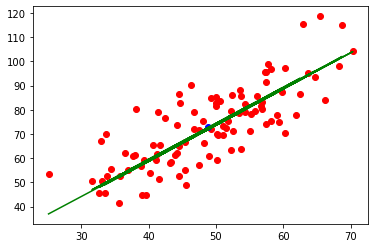

In [18]:
plt.scatter(data.X, data.Y, color = 'r')
plt.plot(data.X, data.gd_pred_val, color = 'g')
plt.scatter(mean_x, mean_y,  color = 'b')
plt.show()

#Comparing manual regression model vs in-built one

In [30]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [22]:
X = np.array(data.X).reshape(-1, 1)
y = np.array(data.Y).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train,y_train)
print(regr.score(X_test, y_test))


0.6236502256926166


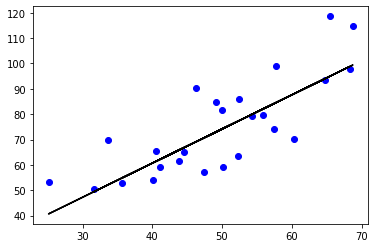

In [24]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

Difference b/w intercept and coefficient(slope)

In [25]:
print('Manual:', m, 'Library:', regr.coef_[0][0])
print('Manual:', c, 'Library:', regr.intercept_[0])

Manual: 1.3399278567668096 Library: 1.3451833100824404
Manual: 7.594998515509658 Library: 6.884689646864956


In [31]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 9.229151948856027
MSE: 133.00237610139317
RMSE: 11.53266561127102
